SVM Accuracy: 0.9666666666666667
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



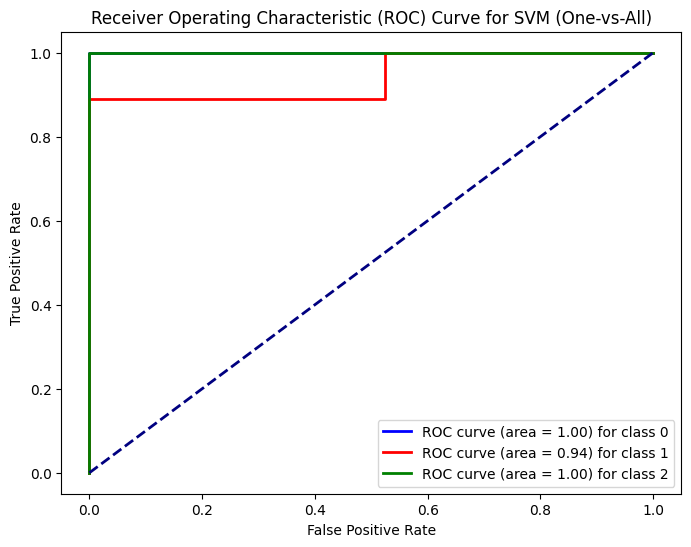

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 1.6266 - accuracy: 0.1750 - val_loss: 1.5665 - val_accuracy: 0.1333
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 1.5073 - accuracy: 0.1833 - val_loss: 1.4634 - val_accuracy: 0.1333
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 1.4158 - accuracy: 0.1833 - val_loss: 1.3817 - val_accuracy: 0.1667
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 1.3430 - accuracy: 0.1917 - val_loss: 1.3076 - val_accuracy: 0.1667
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 1.2726 - accuracy: 0.2000 - val_loss: 1.2410 - val_accuracy: 0.2000
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.2000 - val_loss: 1.1764 - val_accuracy: 0.2000
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 1.1524 - accuracy: 0.2000 - val_loss: 1.1145 - val_accuracy: 0.2333
Epoch 8/50
24/24 [=

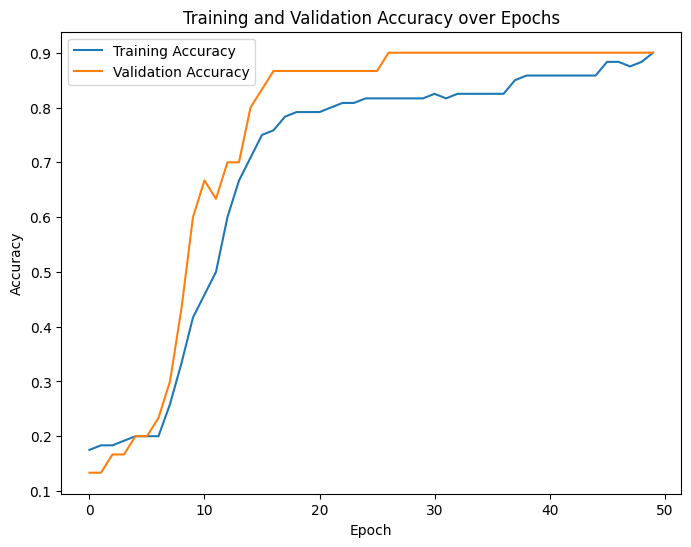

1/1 [==============================] - 0s 78ms/step
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))
y_test_one_hot = to_categorical(y_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], svm_model.decision_function(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), svm_model.decision_function(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(iris.target_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM (One-vs-All)')
plt.legend(loc="lower right")
plt.show()

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1, validation_data=(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

nn_predictions = np.argmax(model.predict(X_test), axis=-1)

print("Classification Report for Neural Network:")
print(classification_report(y_test, nn_predictions))
